In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
colnames = ["review", "rating", "article"]
df_supp = pd.read_csv('./data/allegro/supplements/data.csv', names=colnames, header=None)
df_rtvagd = pd.read_csv('./data/allegro/rtvagd/data.csv', names=colnames, header=None)

In [3]:
df_rtvagd.head(3)

,review,rating,article
0,"Pralka niestety "" tańczy"" bardziej niż bez pod...",1,Mata antywibracyjna SPI 55 4 mm 9 cm x 4 cm
1,Podkładki nie są całe z gumy. Maja tylko gumow...,3,Mata antywibracyjna SPI 55 4 mm 9 cm x 4 cm
2,"Plastikowe, ale pewien efekt antywibracyjny je...",3,Mata antywibracyjna SPI 55 4 mm 9 cm x 4 cm


In [4]:
df_supp.head(3)

,review,rating,article
0,"Trochę za dużo słodzików, mógłby być mniej sło...",4,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...
1,"Żonie nie smakowało, dla mnie OK",4,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...
2,Za słodkie i bardzo bardzo czuć że sztuczne ni...,1,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...


In [5]:
# Pominięcie wielkości liter
df_supp['review'] = df_supp['review'].apply(lambda x: x.lower())
df_rtvagd['review']  = df_rtvagd['review'].apply(lambda x: x.lower())

In [6]:
# Najpopularniejsze opinie:
print("10 Najpopularniejszych opinii dla RTVAGD:")
df_rtvagd.groupby('review').count().sort_values('rating', ascending=False).head(10)

10 Najpopularniejszych opinii dla RTVAGD:


,rating,article
review,,
ok,2333,2333
polecam,1282,1282
super,467,467
wszystko ok,203,203
ok.,168,168
polecam.,111,111
polecam!,76,76
wszystko ok.,63,63
jest ok,54,54


In [7]:
# Najpopularniejsze opinie:
print("10 Najpopularniejszych opinii dla suplementów:")
df_supp.groupby('review').count().sort_values('rating', ascending=False).head(10)

10 Najpopularniejszych opinii dla suplementów:


,rating,article
review,,
ok,1179,1179
polecam,647,647
super,195,195
wszystko ok,110,110
ok.,98,98
polecam!,68,68
polecam.,54,54
działa,41,41
jest ok,41,41


In [8]:
# Usunięcie duplikatów
df_supp = df_supp.drop_duplicates(subset=['review'])
df_rtvagd = df_rtvagd.drop_duplicates(subset=['review'])

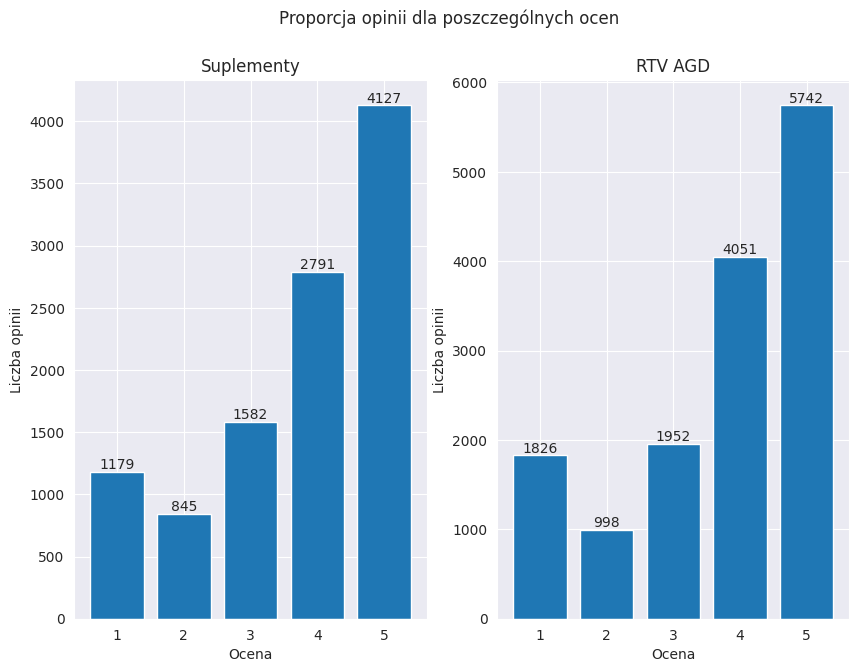

In [9]:
# Wykresy przedstawiające rozłożenie danych w zbiorze

grouped_supp = df_supp.groupby('rating').count()
grouped_rtvagd = df_rtvagd.groupby('rating').count()
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7))
fig.suptitle("Proporcja opinii dla poszczególnych ocen")

bars1 = ax1.bar(grouped_supp.index, grouped_supp['review'])
bars2 = ax2.bar(grouped_rtvagd.index, grouped_rtvagd['review'])

ax1.set_xticks(grouped_supp.index)
ax1.set_xticklabels(grouped_supp.index)
ax1.set_title("Suplementy")
ax1.set_xlabel("Ocena")
ax1.set_ylabel("Liczba opinii")


ax2.set_xticks(grouped_rtvagd.index)
ax2.set_xticklabels(grouped_rtvagd.index)
ax2.set_title("RTV AGD")
ax2.set_xlabel("Ocena")
ax2.set_ylabel("Liczba opinii")

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, str(height),
            ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height, str(height),
            ha='center', va='bottom')

Podczas pobierania opinii w pewnym momencie zostało zastosowane filitrowanie opinii w celu pomijania tych z oceną '5'.
Oceny te stanowią lwią część wszystkich opinii praktycznie dla każdego dostępnego produktu. Stąd w celu uniknięcia
silnego niezbalansowania danych w pewnym momencie, zostały pobierane tylko opinie z ocenami 1-4.

In [10]:
# Długości poszczególnych opinii
df_supp['review_length'] = df_supp.apply(lambda x: len(x['review'].split(" ")), axis=1)
df_rtvagd['review_length'] = df_rtvagd.apply(lambda x: len(x['review'].split(" ")), axis=1)

In [11]:
print(f"Najkrótsza opinia w kategorii RTVAGD: {df_rtvagd['review_length'].min()}")
print(f"Najdłuższa opinia w kategorii RTVAGD: {df_rtvagd['review_length'].max()}")
print(f"Średnia długość opinii w kategorii RTVAGD: {df_rtvagd['review_length'].mean()}")
print(f"Mediana długość opinii w kategorii RTVAGD: {df_rtvagd['review_length'].median()}")

Najkrótsza opinia w kategorii RTVAGD: 1
Najdłuższa opinia w kategorii RTVAGD: 555
Średnia długość opinii w kategorii RTVAGD: 12.482874596746516
Mediana długość opinii w kategorii RTVAGD: 7.0


In [12]:
print(f"Najkrótsza opinia w kategorii suplementy: {df_supp['review_length'].min()}")
print(f"Najdłuższa opinia w kategorii suplementy: {df_supp['review_length'].max()}")
print(f"Średnia długość opinii w kategorii suplementy: {df_supp['review_length'].mean()}")
print(f"Mediana długość opinii w kategorii suplementy: {df_supp['review_length'].median()}")

Najkrótsza opinia w kategorii suplementy: 1
Najdłuższa opinia w kategorii suplementy: 283
Średnia długość opinii w kategorii suplementy: 11.658494868871152
Mediana długość opinii w kategorii suplementy: 7.0


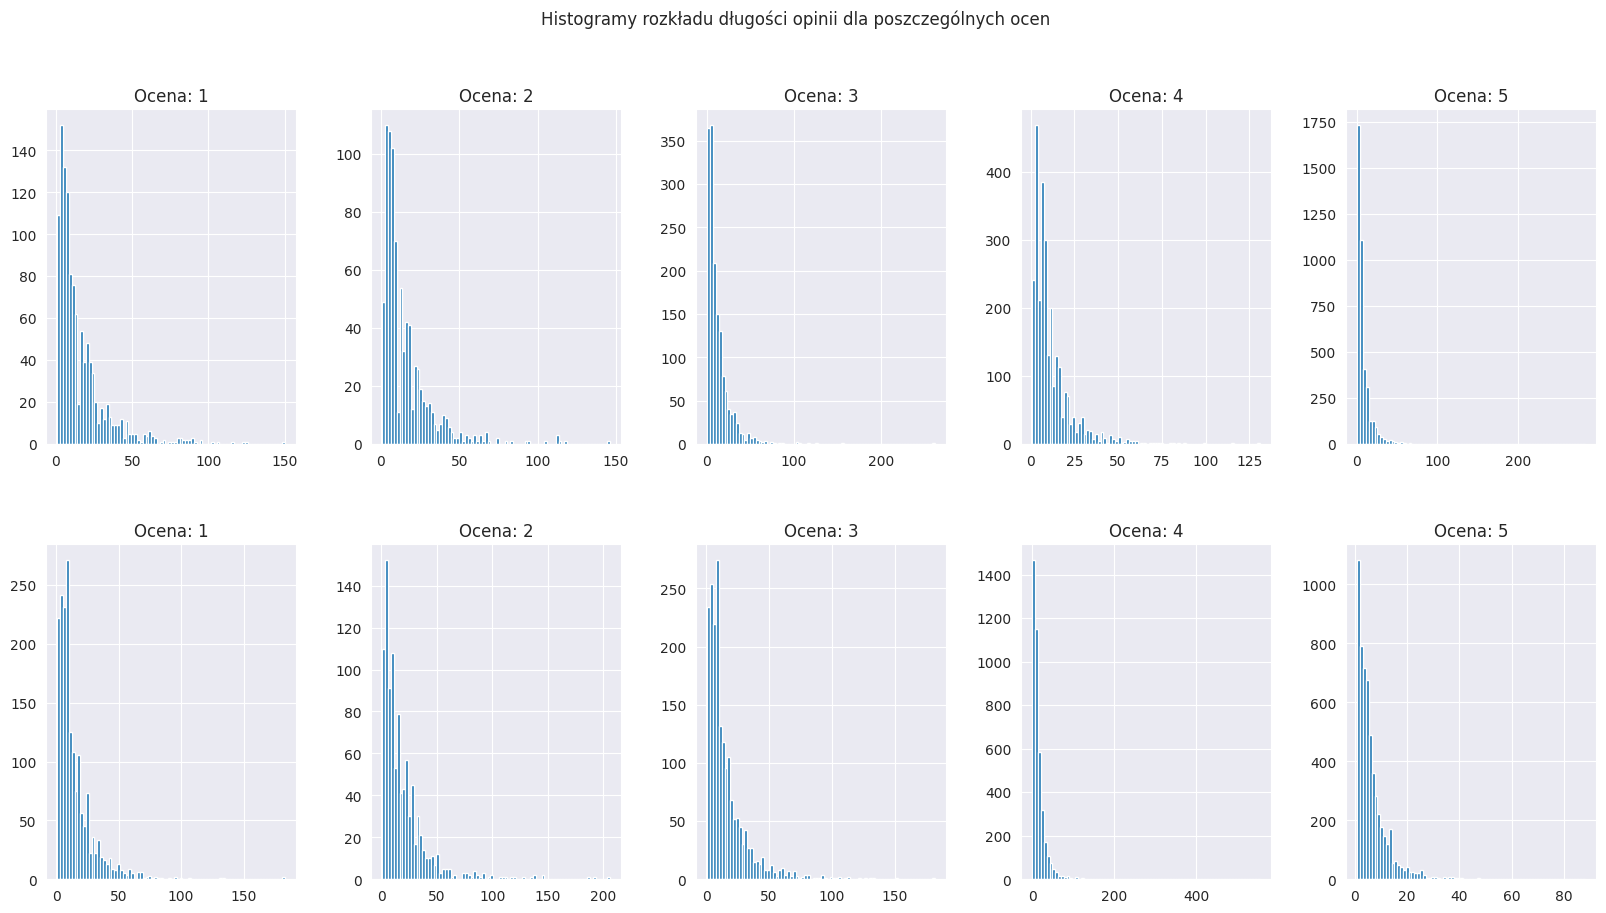

In [13]:
fig,axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle("Histogramy rozkładu długości opinii dla poszczególnych ocen")

for i in range(5):
    df_supp[df_supp['rating'] == i+1].hist(column='review_length', bins=80, ax=axes[0, i])
    axes[0, i].set_title(f"Ocena: {i +1}")

for i in range(5):
    df_rtvagd[df_rtvagd['rating'] == i+1].hist(column='review_length', bins=80, ax=axes[1, i])
    axes[1, i].set_title(f"Ocena: {i +1}")

Text(0.5, 1.0, 'Rozkład długości opinii dla opinii suplementów')

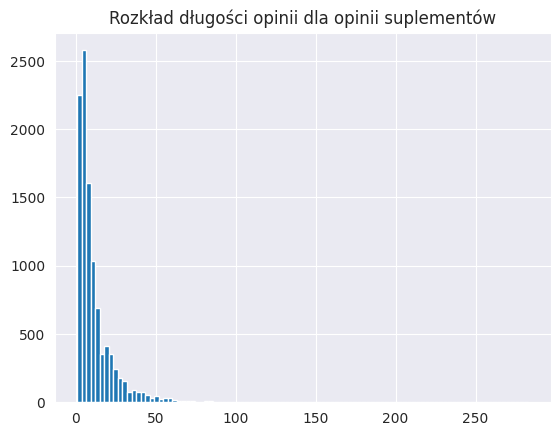

In [14]:
df_supp.hist(column='review_length', bins=100)
plt.title("Rozkład długości opinii dla opinii suplementów")

Text(0.5, 1.0, 'Rozkład długości opinii dla opinii RTVAGD')

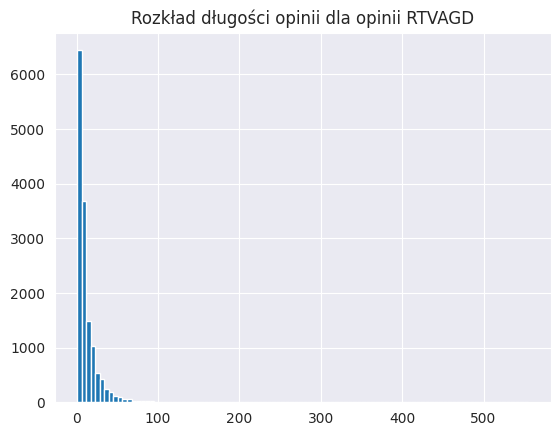

In [15]:
df_rtvagd.hist(column='review_length', bins=100)
plt.title("Rozkład długości opinii dla opinii RTVAGD")

Text(0.5, 1.0, 'Rozkład długości opinii dla opinii RTVAGD (0-80)')

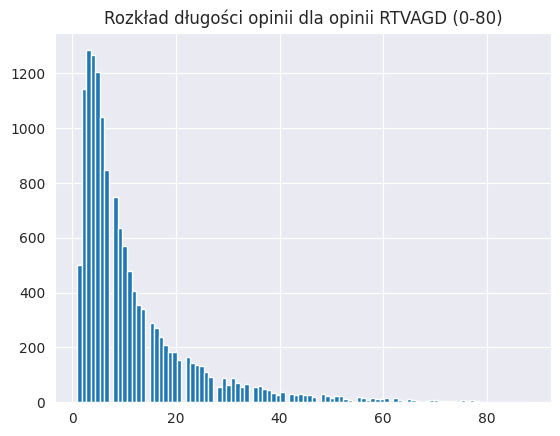

In [16]:
df_rtvagd[(df_rtvagd['review_length'] > 0) & ((df_rtvagd['review_length'] < 80) | (df_rtvagd['rating'] == 5))].hist(column='review_length', bins=100)
plt.title("Rozkład długości opinii dla opinii RTVAGD (0-80)")